<a href="https://colab.research.google.com/github/dhruv025/predicting_length_of_stay_in_hospital/blob/master/los_hospital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#pandas library is used to import dataset
import pandas as pd

In [0]:
import numpy as np

In [0]:
#importing the dataset using pandas library
df = pd.read_csv('drive/My Drive/mimic3d.csv')

In [6]:
#no. of rows and columns
df.shape

(58976, 28)

In [7]:
#this head method returns top n row of dataframe(by default 5)
df.head()

,hadm_id,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,religion,marital_status,ethnicity,NumCallouts,NumDiagnosis,NumProcs,AdmitProcedure,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
0,100001,F,35,6.17,EMERGENCY,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,Private,PROTESTANT QUAKER,DIVORCED,WHITE,0.16,2.59,0.00,na,1.30,25.12,43.44,0.65,0.05,5.19,14.91,1.13,0.65,398.70,0,493.89,1
1,100003,M,59,4.04,EMERGENCY,EMERGENCY ROOM ADMIT,UPPER GI BLEED,Private,NOT SPECIFIED,SINGLE,WHITE,0.25,2.23,0.99,Endosc control gast hem,1.98,13.61,55.94,1.24,1.59,5.45,7.18,0.99,1.24,373.02,0,465.71,1
2,100006,F,48,12.04,EMERGENCY,EMERGENCY ROOM ADMIT,COPD FLARE,Private,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,0.00,0.75,0.17,Non-invasive mech vent,0.83,11.46,33.39,0.33,0.15,4.15,6.23,0.00,0.33,286.21,0,344.00,3
3,100007,F,73,7.29,EMERGENCY,EMERGENCY ROOM ADMIT,BOWEL OBSTRUCTION,Private,JEWISH,MARRIED,WHITE,0.41,0.69,0.27,Part sm bowel resect NEC,0.69,20.30,32.24,0.69,0.17,9.05,11.52,0.00,0.96,526.06,0,603.05,1
4,100009,M,60,4.88,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Private,CATHOLIC,MARRIED,WHITE,0.00,3.69,0.82,Aortocor bypas-3 cor art,2.25,20.49,50.61,0.61,0.34,16.19,25.00,2.87,2.05,554.92,0,679.84,1


In [0]:
#drop method is used to remove a particular column
df = df.drop('hadm_id',axis = 1)

In [9]:
#updated dataset
df.head()

,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,religion,marital_status,ethnicity,NumCallouts,NumDiagnosis,NumProcs,AdmitProcedure,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
0,F,35,6.17,EMERGENCY,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,Private,PROTESTANT QUAKER,DIVORCED,WHITE,0.16,2.59,0.00,na,1.30,25.12,43.44,0.65,0.05,5.19,14.91,1.13,0.65,398.70,0,493.89,1
1,M,59,4.04,EMERGENCY,EMERGENCY ROOM ADMIT,UPPER GI BLEED,Private,NOT SPECIFIED,SINGLE,WHITE,0.25,2.23,0.99,Endosc control gast hem,1.98,13.61,55.94,1.24,1.59,5.45,7.18,0.99,1.24,373.02,0,465.71,1
2,F,48,12.04,EMERGENCY,EMERGENCY ROOM ADMIT,COPD FLARE,Private,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,0.00,0.75,0.17,Non-invasive mech vent,0.83,11.46,33.39,0.33,0.15,4.15,6.23,0.00,0.33,286.21,0,344.00,3
3,F,73,7.29,EMERGENCY,EMERGENCY ROOM ADMIT,BOWEL OBSTRUCTION,Private,JEWISH,MARRIED,WHITE,0.41,0.69,0.27,Part sm bowel resect NEC,0.69,20.30,32.24,0.69,0.17,9.05,11.52,0.00,0.96,526.06,0,603.05,1
4,M,60,4.88,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Private,CATHOLIC,MARRIED,WHITE,0.00,3.69,0.82,Aortocor bypas-3 cor art,2.25,20.49,50.61,0.61,0.34,16.19,25.00,2.87,2.05,554.92,0,679.84,1


In [10]:
#no. of row and colums after updation
df.shape

(58976, 27)

In [11]:
#describe method is used to view some statistical details
df.describe()

,age,LOSdays,NumCallouts,NumDiagnosis,NumProcs,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
count,58976.000000,58976.000000,58976.000000,58976.00000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000
mean,53.005884,10.114955,0.099374,2.67596,0.785599,1.074118,30.379017,46.421124,1.219913,6.464789,7.111594,9.593702,0.691903,1.093313,528.505172,0.099261,636.115579,1.360248
std,26.028120,12.456231,0.163437,8.26559,3.558090,2.027148,62.430163,76.061561,4.236693,106.709903,7.551822,12.601338,2.117615,3.169441,640.250063,0.299014,783.938087,1.130337
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.000000,3.710000,0.000000,0.82000,0.210000,0.000000,4.850000,26.980000,0.160000,0.140000,1.750000,4.330000,0.000000,0.380000,207.410000,0.000000,267.407500,0.000000
50%,59.000000,6.460000,0.000000,1.41000,0.420000,0.970000,13.990000,38.520000,0.510000,0.330000,5.310000,8.370000,0.000000,0.650000,417.875000,0.000000,497.335000,1.000000
75%,73.000000,11.790000,0.160000,2.40000,0.710000,1.560000,34.360000,50.860000,1.350000,0.770000,10.490000,12.270000,0.880000,1.060000,700.302500,0.000000,811.382500,2.000000
max,89.000000,294.630000,4.760000,450.00000,275.000000,225.000000,6825.000000,5175.000000,375.000000,7500.000000,375.000000,750.000000,100.000000,125.000000,49325.000000,1.000000,68600.000000,3.000000


In [0]:
#y_train is having dependent variable
y_train = df['LOSgroupNum']

In [13]:
y_train

0        1
1        1
2        3
3        1
4        1
        ..
58971    3
58972    2
58973    3
58974    1
58975    1
Name: LOSgroupNum, Length: 58976, dtype: int64

In [0]:
#x_train are having independent variables
x_train = df.drop('LOSgroupNum',1)

In [15]:
x_train.shape

(58976, 26)

In [0]:
#Removing the columns from the x_train whose features didn't contribute to the model
x_train = x_train.drop(['LOSdays','AdmitDiagnosis','insurance','religion','marital_status','ethnicity','AdmitProcedure','ExpiredHospital'],axis=1)

In [17]:
x_train.shape

(58976, 18)

In [18]:
y_train

0        1
1        1
2        3
3        1
4        1
        ..
58971    3
58972    2
58973    3
58974    1
58975    1
Name: LOSgroupNum, Length: 58976, dtype: int64

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

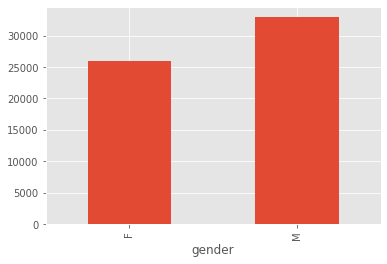

In [20]:
#visualization of certain features using bar plot
df.groupby('gender').size().plot.bar()

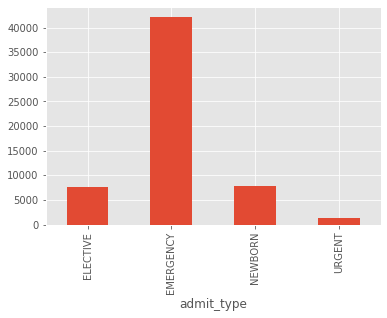

In [21]:
df.groupby('admit_type').size().plot.bar()

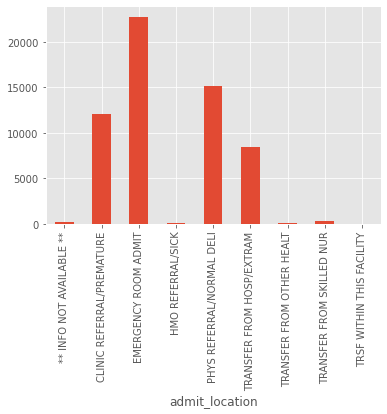

In [22]:
df.groupby('admit_location').size().plot.bar()

In [23]:
#checking for mising values in x_train
pd.isnull(x_train).values.any()

False

In [24]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            58976 non-null  object 
 1   age               58976 non-null  int64  
 2   admit_type        58976 non-null  object 
 3   admit_location    58976 non-null  object 
 4   NumCallouts       58976 non-null  float64
 5   NumDiagnosis      58976 non-null  float64
 6   NumProcs          58976 non-null  float64
 7   NumCPTevents      58976 non-null  float64
 8   NumInput          58976 non-null  float64
 9   NumLabs           58976 non-null  float64
 10  NumMicroLabs      58976 non-null  float64
 11  NumNotes          58976 non-null  float64
 12  NumOutput         58976 non-null  float64
 13  NumRx             58976 non-null  float64
 14  NumProcEvents     58976 non-null  float64
 15  NumTransfers      58976 non-null  float64
 16  NumChartEvents    58976 non-null  float6

In [0]:
from sklearn import preprocessing

In [0]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [0]:
#since, we have 3 categorical values in x_train, so to convert these values to numeric we will use one hot encoding
categorical_var = ['gender','admit_type','admit_location']
for i in categorical_var:
  if i in x_train.columns:
    dummy = pd.get_dummies(x_train[i])
    x_train = x_train.drop(i,axis=1)
    x_train = pd.concat([x_train,dummy],axis=1)

In [28]:
#x_train after applying one hot encoding
x_train

,age,NumCallouts,NumDiagnosis,NumProcs,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,TotalNumInteract,F,M,ELECTIVE,EMERGENCY,NEWBORN,URGENT,** INFO NOT AVAILABLE **,CLINIC REFERRAL/PREMATURE,EMERGENCY ROOM ADMIT,HMO REFERRAL/SICK,PHYS REFERRAL/NORMAL DELI,TRANSFER FROM HOSP/EXTRAM,TRANSFER FROM OTHER HEALT,TRANSFER FROM SKILLED NUR,TRSF WITHIN THIS FACILITY
0,35,0.16,2.59,0.00,1.30,25.12,43.44,0.65,0.05,5.19,14.91,1.13,0.65,398.70,493.89,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,59,0.25,2.23,0.99,1.98,13.61,55.94,1.24,1.59,5.45,7.18,0.99,1.24,373.02,465.71,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
2,48,0.00,0.75,0.17,0.83,11.46,33.39,0.33,0.15,4.15,6.23,0.00,0.33,286.21,344.00,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,73,0.41,0.69,0.27,0.69,20.30,32.24,0.69,0.17,9.05,11.52,0.00,0.96,526.06,603.05,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,60,0.00,3.69,0.82,2.25,20.49,50.61,0.61,0.34,16.19,25.00,2.87,2.05,554.92,679.84,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,60,0.00,0.37,0.53,0.94,330.92,66.56,0.20,0.13,23.11,8.01,0.00,0.08,1315.46,1746.31,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
58972,58,0.00,0.92,0.41,0.62,95.18,53.03,2.26,0.30,7.90,0.00,0.00,0.31,674.05,834.98,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
58973,23,0.00,0.60,0.54,0.06,12.66,27.28,0.54,0.10,6.27,5.79,0.00,0.36,207.10,261.30,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
58974,69,0.00,2.72,0.51,0.17,25.85,49.83,0.17,0.35,12.24,17.69,0.00,1.02,426.87,537.42,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0


In [29]:
df.shape

(58976, 27)

In [30]:
x_train.shape

(58976, 30)

In [31]:
x_not_scaled = x_train.copy()
y_not_scaled = y_train.copy()
print(x_not_scaled.shape)
print(y_not_scaled.shape)

(58976, 30)
(58976,)


In [0]:
X_not_scaled = x_not_scaled.values
Y_not_scaled = y_not_scaled.values

In [33]:
X_not_scaled

array([[35.  ,  0.16,  2.59, ...,  0.  ,  0.  ,  0.  ],
       [59.  ,  0.25,  2.23, ...,  0.  ,  0.  ,  0.  ],
       [48.  ,  0.  ,  0.75, ...,  0.  ,  0.  ,  0.  ],
       ...,
       [23.  ,  0.  ,  0.6 , ...,  0.  ,  0.  ,  0.  ],
       [69.  ,  0.  ,  2.72, ...,  0.  ,  0.  ,  0.  ],
       [88.  ,  0.  ,  2.36, ...,  0.  ,  0.  ,  0.  ]])

In [34]:
Y_not_scaled

array([1, 1, 3, ..., 3, 1, 1])

In [0]:
#featue scaling
scaler = preprocessing.StandardScaler()

In [36]:
scaler.fit_transform(X_not_scaled)

array([[-0.69179166,  0.37094948, -0.01039984, ..., -0.03471787,
        -0.06819479, -0.00920801],
       [ 0.23029581,  0.92162658, -0.05395427, ..., -0.03471787,
        -0.06819479, -0.00920801],
       [-0.19232761, -0.60803204, -0.23301137, ..., -0.03471787,
        -0.06819479, -0.00920801],
       ...,
       [-1.15283539, -0.60803204, -0.25115905, ..., -0.03471787,
        -0.06819479, -0.00920801],
       [ 0.61449892, -0.60803204,  0.00532815, ..., -0.03471787,
        -0.06819479, -0.00920801],
       [ 1.34448483, -0.60803204, -0.03822628, ..., -0.03471787,
        -0.06819479, -0.00920801]])

In [37]:
scaler.fit_transform(Y_not_scaled.reshape(-1,1))

array([[-0.31871126],
       [-0.31871126],
       [ 1.45068679],
       ...,
       [ 1.45068679],
       [-0.31871126],
       [-0.31871126]])

In [0]:
x_scaled = scaler.fit_transform(X_not_scaled)

In [0]:
y_scaled = scaler.fit_transform(Y_not_scaled.reshape(-1,1))

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
#splitting the dataset into training(80%) and test(20%) dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_not_scaled,Y_not_scaled,test_size = 0.2)

In [42]:
len(X_train)

47180

In [43]:
len(X_test)

11796

In [0]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [0]:
#n_estimators denote no. of random trees
model = RandomForestRegressor(n_estimators=100)

In [46]:
model.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
y_pred = model.predict(X_test)

In [48]:
X_test

array([[58.  ,  0.51,  3.06, ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.84, ...,  0.  ,  0.  ,  0.  ],
       [66.  ,  0.  ,  0.66, ...,  0.  ,  0.  ,  0.  ],
       ...,
       [83.  ,  0.  ,  6.27, ...,  0.  ,  0.  ,  0.  ],
       [70.  ,  0.13,  1.94, ...,  0.  ,  0.  ,  0.  ],
       [75.  ,  0.  ,  1.47, ...,  0.  ,  0.  ,  0.  ]])

In [0]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [50]:
print('Mean Absolute Error:',mean_absolute_error(Y_test,y_pred))

Mean Absolute Error: 0.14695320447609359


In [51]:
Y_test

array([0, 1, 3, ..., 0, 3, 1])

In [52]:
y_pred

array([0.  , 1.05, 2.99, ..., 0.1 , 2.18, 0.57])

In [53]:
print('Mean Squared Error:',mean_squared_error(Y_test,y_pred))

Mean Squared Error: 0.08321931163106137


In [54]:
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test,y_pred)))

Root Mean Squared Error: 0.28847757561214593


In [55]:
print('r2_score:',r2_score(Y_test,y_pred))

r2_score: 0.934397222684139


In [56]:
model.predict([[35, 0.16, 2.59, 0.00, 1.30, 25.12, 43.44, 0.65, 0.05, 5.19, 14.91, 1.13, 0.65, 398.70, 493.89, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

array([1.])

In [57]:
model.predict([[21, 0.07, 0.97, 1.04, 3.13, 62.38, 43.46, 1.88, 0.21, 18.01, 9.94, 4.10, 0.21, 1337.13, 1482.53, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

array([2.98])

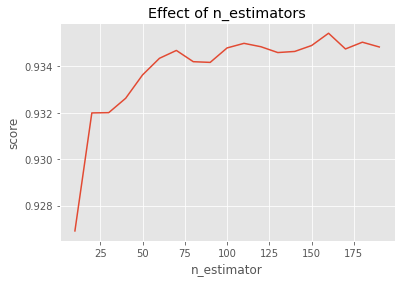

In [58]:
#trying different numbers of n_estimators
estimators = np.arange(10, 200, 10)
scores = []
for i in estimators:
  model.set_params(n_estimators = i)
  model.fit(X_train, Y_train)
  scores.append(model.score(X_test,Y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [0]:
#splitting the dataset into training(70%) and test(30%) dataset
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled,Y_not_scaled,test_size = 0.3)

In [0]:
#Support Vector Regressor
from sklearn.svm import SVR

In [61]:
model = SVR(kernel='rbf')
model.fit(X_train,Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred = model.predict(X_test)

In [63]:
y_pred

array([ 2.80169992,  0.29325004, -0.81276203, ...,  1.33354294,
        0.78629722,  2.60960073])

In [64]:
print('Mean Absolute Error:',mean_absolute_error(Y_test,y_pred))
print('Mean Squared Error:',mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test,y_pred)))
print('r2_score:',r2_score(Y_test,y_pred))

Mean Absolute Error: 0.43987482797050176
Mean Squared Error: 0.3299277416050555
Root Mean Squared Error: 0.5743933683505195
r2_score: 0.7417203159329842


<function matplotlib.pyplot.show>

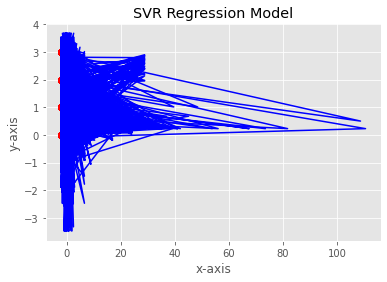

In [65]:
plt.scatter(X_train[:,0], Y_train, color = 'red')
plt.plot(X_test, model.predict(X_test), color = 'blue')
plt.title('SVR Regression Model')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show

In [0]:
#Decison Tree Regressor
from sklearn.tree import DecisionTreeRegressor

In [0]:
model = DecisionTreeRegressor(random_state = 0)

In [68]:
model.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [0]:
y_pred = model.predict(X_test)

In [70]:
y_pred

array([3., 0., 0., ..., 1., 1., 3.])

In [71]:
print('Mean Absolute Error:',mean_absolute_error(Y_test,y_pred))
print('Mean Squared Error:',mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test,y_pred)))
print('r2_score:',r2_score(Y_test,y_pred))

Mean Absolute Error: 0.1532244390436896
Mean Squared Error: 0.18261459334199967
Root Mean Squared Error: 0.42733428758057745
r2_score: 0.8570425171131607


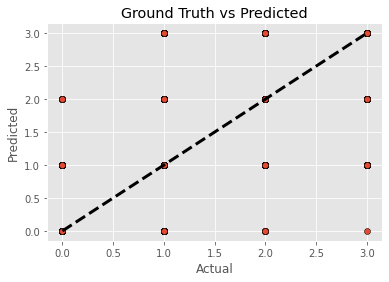

In [72]:
#so, lets run the model against the test data
from sklearn.model_selection import cross_val_predict
fig, ax = plt.subplots()
ax.scatter(Y_test, y_pred, edgecolors = (0,0,0))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw = 3)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Ground Truth vs Predicted')
plt.show()

In [0]:
MLA = []
MLA.append(RandomForestRegressor())
MLA.append(SVR())
MLA.append(DecisionTreeRegressor())

In [74]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:
  y_pred = alg.fit(X_train, Y_train).predict(X_test)
  MLA_name = alg.__class__.__name__
  MLA_compare.loc[row_index,'MLA Name'] = MLA_name
  MLA_compare.loc[row_index, 'Mean Absolute Error'] = mean_absolute_error(Y_test,y_pred)
  MLA_compare.loc[row_index, 'Mean Squared Error'] = mean_squared_error(Y_test,y_pred)
  MLA_compare.loc[row_index, 'Root Mean Squared Error'] = np.sqrt(mean_squared_error(Y_test,y_pred))
  MLA_compare.loc[row_index, 'r2_score'] = r2_score(Y_test,y_pred)

  row_index+=1
MLA_compare.sort_values(by = ['r2_score'], ascending = False, inplace = True)    
MLA_compare

,MLA Name,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,r2_score
0,RandomForestRegressor,0.149810,0.084292,0.290331,0.934013
2,DecisionTreeRegressor,0.154298,0.183010,0.427797,0.856733
1,SVR,0.439875,0.329928,0.574393,0.741720


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


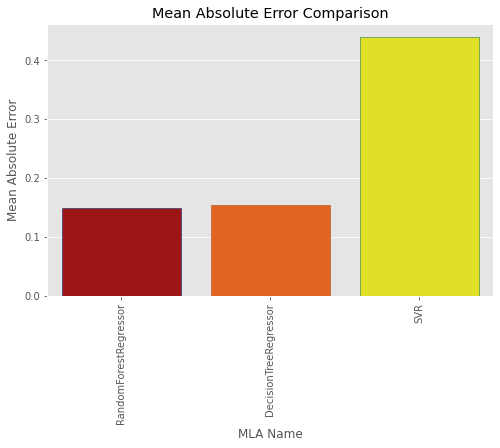

In [75]:
import seaborn as sns
plt.subplots(figsize=(8,5))
sns.barplot(x = "MLA Name", y = "Mean Absolute Error", data = MLA_compare, palette = 'hot', edgecolor = sns.color_palette('dark',7))
plt.xticks(rotation = 90)
plt.title('Mean Absolute Error Comparison')
plt.show()

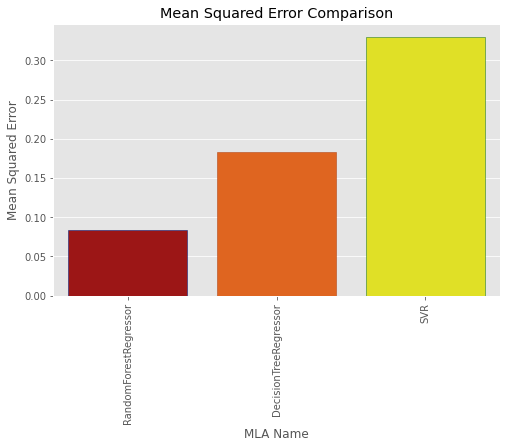

In [76]:
import seaborn as sns
plt.subplots(figsize=(8,5))
sns.barplot(x = "MLA Name", y = "Mean Squared Error", data = MLA_compare, palette = 'hot', edgecolor = sns.color_palette('dark',7))
plt.xticks(rotation = 90)
plt.title('Mean Squared Error Comparison')
plt.show()

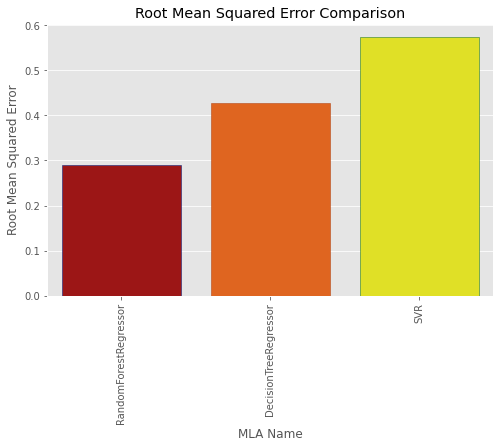

In [77]:
import seaborn as sns
plt.subplots(figsize=(8,5))
sns.barplot(x = "MLA Name", y = "Root Mean Squared Error", data = MLA_compare, palette = 'hot', edgecolor = sns.color_palette('dark',7))
plt.xticks(rotation = 90)
plt.title('Root Mean Squared Error Comparison')
plt.show()

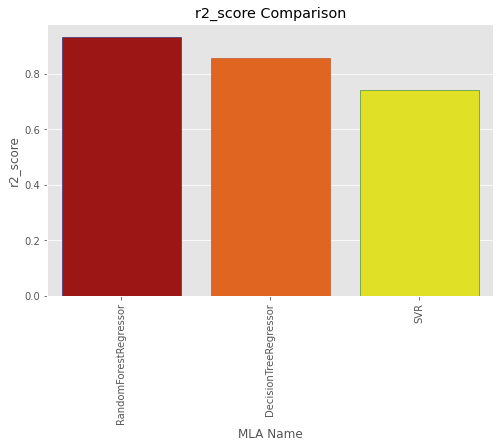

In [78]:
import seaborn as sns
plt.subplots(figsize=(8,5))
sns.barplot(x = "MLA Name", y = "r2_score", data = MLA_compare, palette = 'hot', edgecolor = sns.color_palette('dark',7))
plt.xticks(rotation = 90)
plt.title('r2_score Comparison')
plt.show()